The algorithm looks to use PCA to achieve dimensionality reduction on an image's RGB channels. The image is initially read in and divided into its R, G, and B channels. Then, after performing PCA on each channel separately and combining the results into a single array, each channel's pixel values are normalised between 0 and 1. The R, G, and B channels are then individually rebuilt from their reduced representations using PCA before being combined once more to create the reconstructed image.

Overall, this algorithm attempts to keep the most crucial information while reducing the number of dimensions in an image. Compression, denoising, or feature extraction may benefit from this.

PCA - Principal Dimensionality Reduction

Idea of PCA : Dimensionality Reduction

Unsupervised learning

Preserving most of the varience while reducing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
img=cv2.cvtColor(cv2.imread("bird.jpg"),cv2.COLOR_BGR2RGB)        #when importing an img its in bgr -> rgb

In [3]:
img.shape   #RGB

(273, 409, 3)

Reduce one of those to lower dimensions

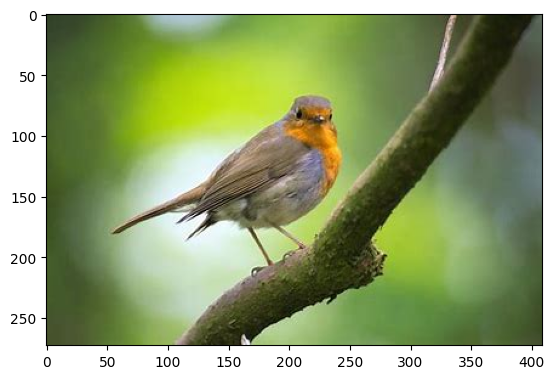

In [4]:
plt.imshow(img)

In [5]:
r,g,b = cv2.split(img)

In [6]:
r,g,b=r/255,g/255,b/255 #normalise to make it btw 0 to 1

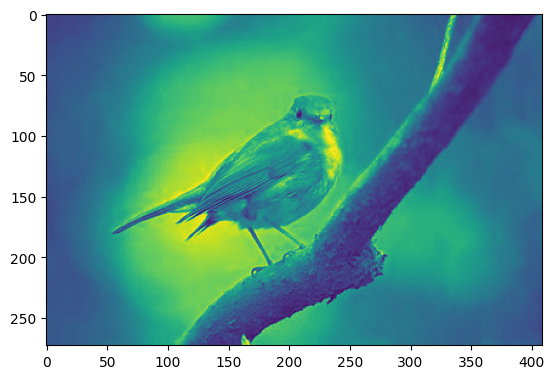

In [7]:
plt.imshow(r)

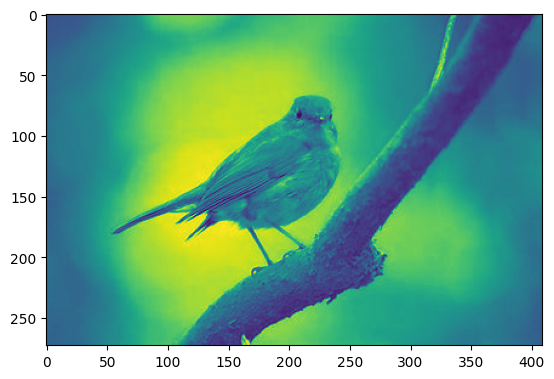

In [8]:
plt.imshow(g)

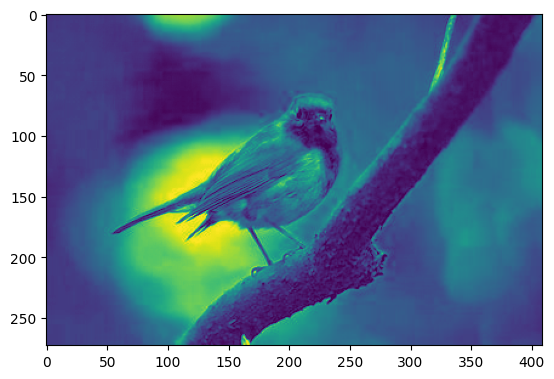

In [9]:
plt.imshow(b)

Reduce how much we want to reduce

In [10]:
pca_components = 50 #that img.shape

pca_r = PCA(n_components=pca_components)
reduced_r = pca_r.fit_transform(r)

In [11]:
reduced_r.shape

(273, 50)

In [12]:
pca_g = PCA(n_components=pca_components)
reduced_g = pca_g.fit_transform(g)

pca_b = PCA(n_components=pca_components)
reduced_b = pca_b.fit_transform(b)

Combine them into an object

In [13]:
combined = np.array([reduced_r, reduced_g, reduced_b])

In [14]:
combined.shape

(3, 273, 50)

In [15]:
#combined.reshape(1336,50,3).shape       #simply

Use the pca_i to inverse the transformation to reconstruct the original channel

In [16]:
reconstructed_r = pca_r.inverse_transform(reduced_r)
reconstructed_g = pca_g.inverse_transform(reduced_g)
reconstructed_b = pca_b.inverse_transform(reduced_b)

In [17]:
reconstructed_r.shape

(273, 409)

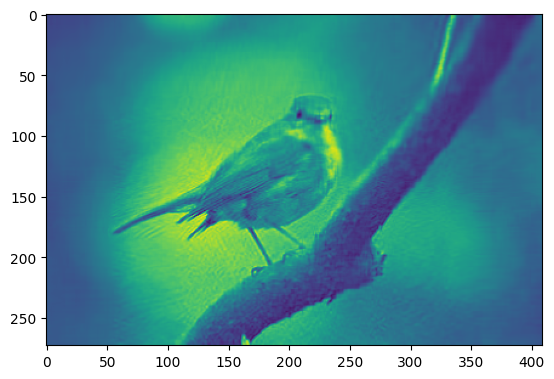

In [18]:
plt.imshow(reconstructed_r)

Now the opposite of splitting(initially) -> Merging

In [19]:
img_reconstructed = (cv2.merge((reconstructed_r,reconstructed_g,reconstructed_b)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


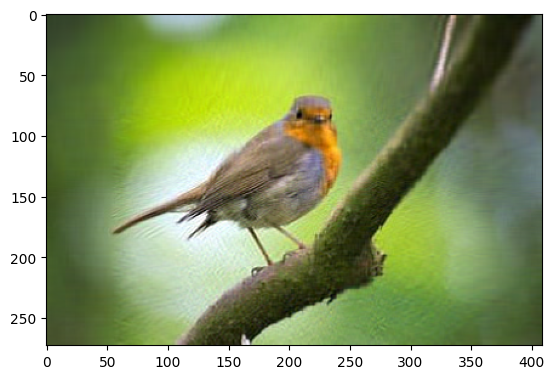

In [20]:
plt.imshow(img_reconstructed)